# CIFAR-10 물체 종류 이미지(0-9) 분류하기

## 데이터 준비하기

In [ ]:
from tensorflow.keras.datasets import cifar10

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 데이터 그려보기

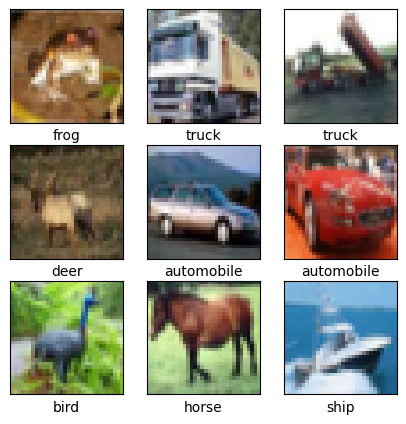

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

## 데이터 전처리

In [ ]:
# 평균과 표준편차는 채널별로 구해줍니다.
# numpy 를 사용해 각각의 축에 접근 가능
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

# 스케일링 (Standardization)
x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


## CIFAR-10 이미지 분류를 위한 CNN 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [ ]:
y_train[0]

array([8], dtype=uint8)

## 모델 설정하기

### 손실함수 -> sparse_categorical_crossentropy
* `sparse_categorical_crossentropy`는 딥러닝에서 분류 문제를 위한 손실 함수(loss function) 중 하나입니다.
* 이 함수는 정수 인코딩된 레이블을 사용할 때 주로 사용되며, 일반적인 `categorical_crossentropy`와 유사하게 동작합니다.
* 다중 클래스 분류 문제에서, 손실 함수는 모델의 예측이 정확한지 판단하는 데 사용되는 척도입니다.
* `sparse_categorical_crossentropy`는 원-핫 인코딩된 레이블 대신 정수 인코딩된 레이블을 직접 처리할 수 있습니다. 예를 들어, 5개의 클래스가 있는 경우 원-핫 인코딩된 레이블은 `[0, 0, 1, 0, 0]`와 같이 표현되지만, `sparse_categorical_crossentropy`를 사용하는 경우 정수 인코딩된 레이블은 `[2]`와 같이 표시됩니다.

* `sparse_categorical_crossentropy`의 핵심 원리는 소프트맥스 활성화 함수를 사용하여 모델의 출력값을 확률 분포로 변환하고, 이를 정답 레이블의 확률 분포와 비교하여 차이를 최소화하는 방향으로 모델을 학습시키는 것입니다. 이 때 차이를 계산하는 방법으로 크로스 엔트로피(cross-entropy)를 사용합니다.

* 딥러닝 모델에서 분류 문제를 해결하려는 경우, 정수 인코딩된 레이블을 사용하면 원-핫 인코딩 보다 메모리 효율적이기 때문에 이러한 경우에는 `sparse_categorical_crossentropy` 손실 함수를 사용하는 것을 추천합니다.

In [ ]:
model.compile(optimizer = Adam(1e-4), # 러닝레이트를 정해줌
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

## 모델 학습하기

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 18s 7ms/step - loss: 1.6178 - acc: 0.4130 - val_loss: 1.3551 - val_acc: 0.5093
Epoch 2/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2635 - acc: 0.5535 - val_loss: 1.1868 - val_acc: 0.5723
Epoch 3/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0840 - acc: 0.6195 - val_loss: 1.0631 - val_acc: 0.6179
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9597 - acc: 0.6631 - val_loss: 0.9852 - val_acc: 0.6527
Epoch 5/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.8607 - acc: 0.6994 - val_loss: 0.9114 - val_acc: 0.6797
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7680 - acc: 0.7339 - val_loss: 0.8931 - val_acc: 0.6880
Epoch 7/30
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6960 - acc: 0.7574 - val_loss: 0.8667 - val_acc: 0.6996
Epoch 8/30
1094/1094 [==============================] - 12s 1

## 학습 결과 분석

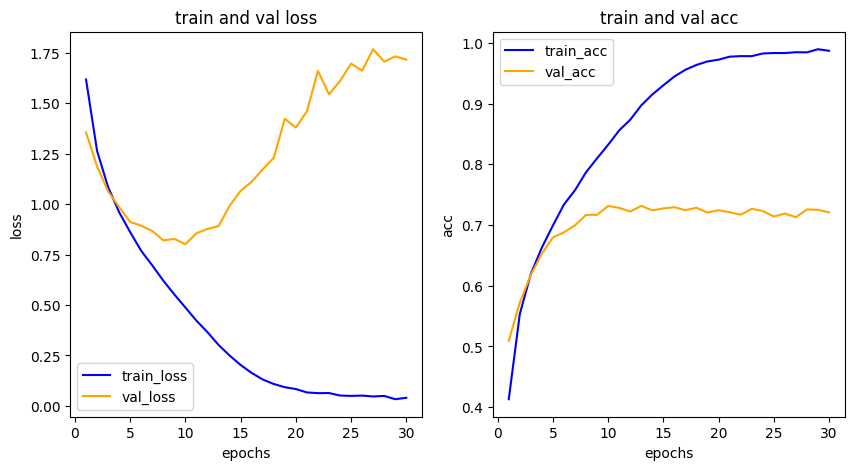

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.7506 - acc: 0.7164


[1.7506482601165771, 0.7164000272750854]

## 모델 학습 결과


*   학습 10번 이후 과대적합
*   과대적합 피하고, 정확도는 높히기
*   과대적합 피하는 방법 -> 모델 수정 (드롭아웃 (dropout) 추가)
*   규제화 함수, 드롭아웃(가장효과적), 배치정규화





## 드롭아웃 추가한 CNN 모델 구성

In [ ]:
from keras.layers import Dropout

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# 전체 추출 후 다음 작업을 할 떄 드롭아웃을 하는 것이 좋음
model.add(Dropout(0.2)) # 비율 맞추는게 중요

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

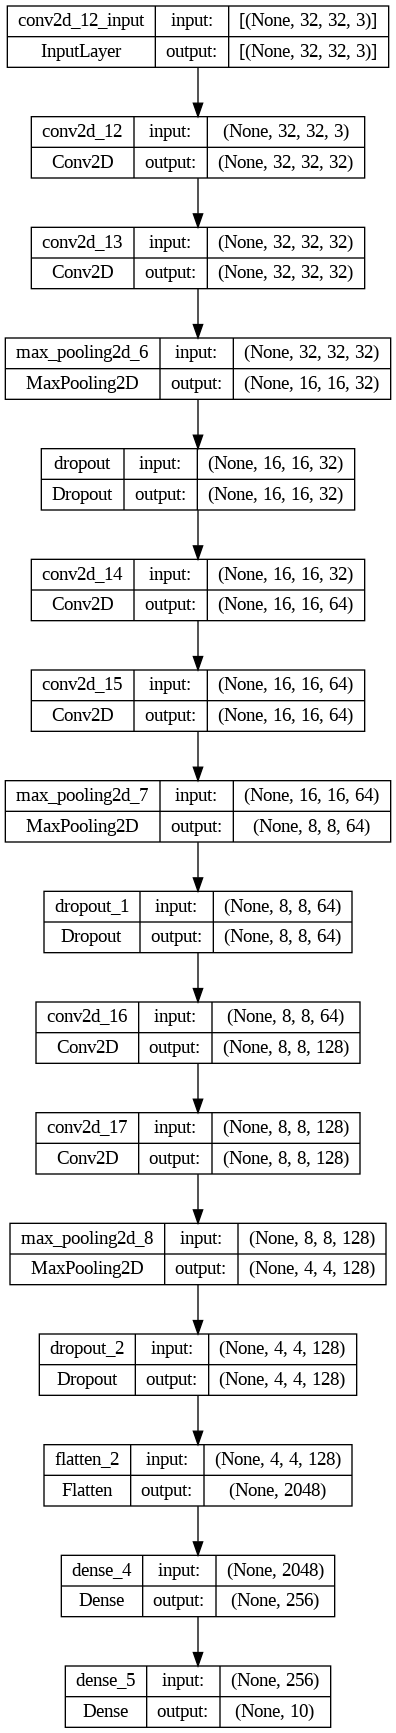

In [ ]:
from keras.utils import plot_model

plot_model(model, 'model.png' ,show_shapes=True)

## 모델 설정 및 학습하기

In [ ]:
model.compile(optimizer = Adam(1e-4), # 러닝레이트를 정해줌
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 16s 11ms/step - loss: 1.7205 - acc: 0.3738 - val_loss: 1.4305 - val_acc: 0.4865
Epoch 2/30
1094/1094 [==============================] - 8s 8ms/step - loss: 1.3742 - acc: 0.5061 - val_loss: 1.2616 - val_acc: 0.5418
Epoch 3/30
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2208 - acc: 0.5665 - val_loss: 1.1326 - val_acc: 0.5972
Epoch 4/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1073 - acc: 0.6087 - val_loss: 1.0609 - val_acc: 0.6246
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0166 - acc: 0.6431 - val_loss: 0.9691 - val_acc: 0.6592
Epoch 6/30
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9454 - acc: 0.6662 - val_loss: 0.9164 - val_acc: 0.6800
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8760 - acc: 0.6920 - val_loss: 0.8723 - val_acc: 0.6951
Epoch 8/30
1094/1094 [==============================] - 8s 

## 학습 결과 분석

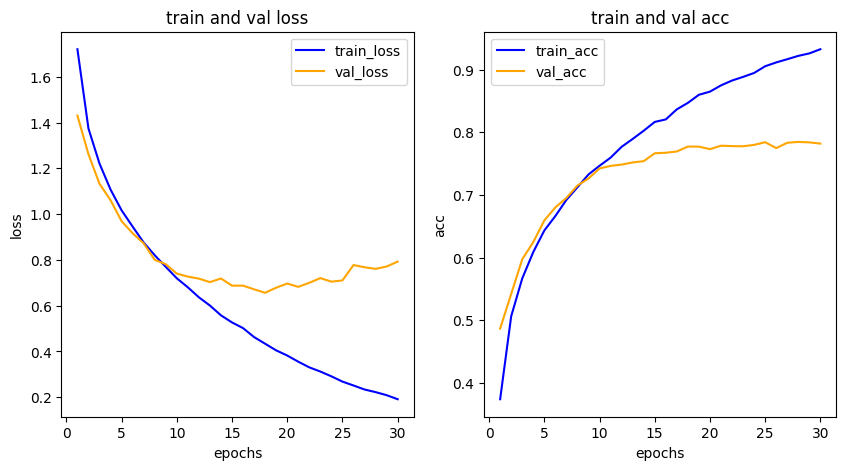

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test) # 성능이 좋아짐

313/313 [==============================] - 1s 3ms/step - loss: 0.8199 - acc: 0.7766


[0.8198517560958862, 0.7766000032424927]

## 최종 모델 구성 및 학습

In [ ]:
model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# 전체 추출 후 다음 작업을 할 떄 드롭아웃을 하는 것이 좋음
model.add(Dropout(0.2)) # 비율 맞추는게 중요

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4), # 러닝레이트를 정해줌
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
1094/1094 [==============================] - 13s 10ms/step - loss: 1.7425 - acc: 0.3650 - val_loss: 1.4684 - val_acc: 0.4675
Epoch 2/15
1094/1094 [==============================] - 12s 11ms/step - loss: 1.3784 - acc: 0.5088 - val_loss: 1.2481 - val_acc: 0.5521
Epoch 3/15
1094/1094 [==============================] - 12s 11ms/step - loss: 1.2080 - acc: 0.5712 - val_loss: 1.1152 - val_acc: 0.6048
Epoch 4/15
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0895 - acc: 0.6158 - val_loss: 1.0359 - val_acc: 0.6323
Epoch 5/15
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9929 - acc: 0.6512 - val_loss: 0.9525 - val_acc: 0.6624
Epoch 6/15
1094/1094 [==============================] - 9s 8ms/step - loss: 0.9214 - acc: 0.6790 - val_loss: 0.8936 - val_acc: 0.6863
Epoch 7/15
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8535 - acc: 0.6999 - val_loss: 0.8641 - val_acc: 0.7013
Epoch 8/15
1094/1094 [==============================] -

## 최종 모델 학습 결과 분석

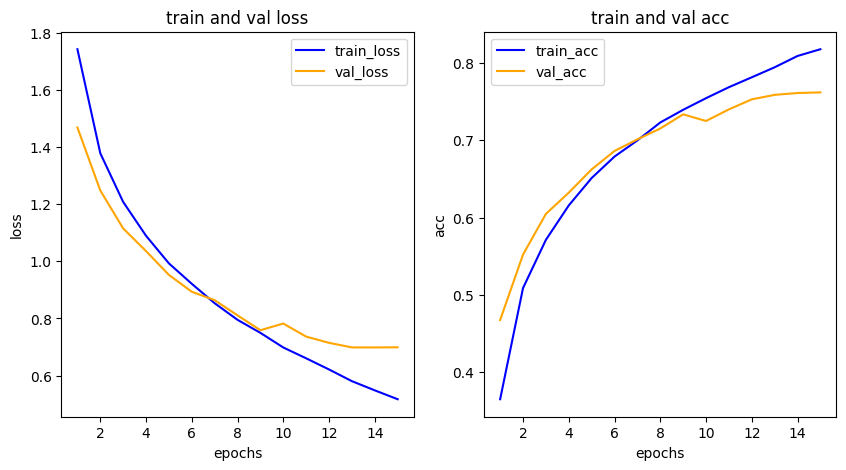

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 최종 모델 평가하기

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7028 - acc: 0.7570


[0.7028486132621765, 0.7570000290870667]

+++ epoch 20으로 해보기

In [ ]:
model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3))) #RGB
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# 전체 추출 후 다음 작업을 할 떄 드롭아웃을 하는 것이 좋음
model.add(Dropout(0.2)) # 비율 맞추는게 중요

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4), # 러닝레이트를 정해줌
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/20
1094/1094 [==============================] - 13s 9ms/step - loss: 1.7294 - acc: 0.3729 - val_loss: 1.4365 - val_acc: 0.4838
Epoch 2/20
1094/1094 [==============================] - 9s 8ms/step - loss: 1.3662 - acc: 0.5079 - val_loss: 1.2696 - val_acc: 0.5406
Epoch 3/20
1094/1094 [==============================] - 11s 10ms/step - loss: 1.2260 - acc: 0.5629 - val_loss: 1.1536 - val_acc: 0.5919
Epoch 4/20
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1141 - acc: 0.6041 - val_loss: 1.0400 - val_acc: 0.6295
Epoch 5/20
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0200 - acc: 0.6376 - val_loss: 0.9567 - val_acc: 0.6605
Epoch 6/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.9457 - acc: 0.6665 - val_loss: 0.9477 - val_acc: 0.6669
Epoch 7/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8880 - acc: 0.6865 - val_loss: 0.8927 - val_acc: 0.6864
Epoch 8/20
1094/1094 [==============================] - 8s 

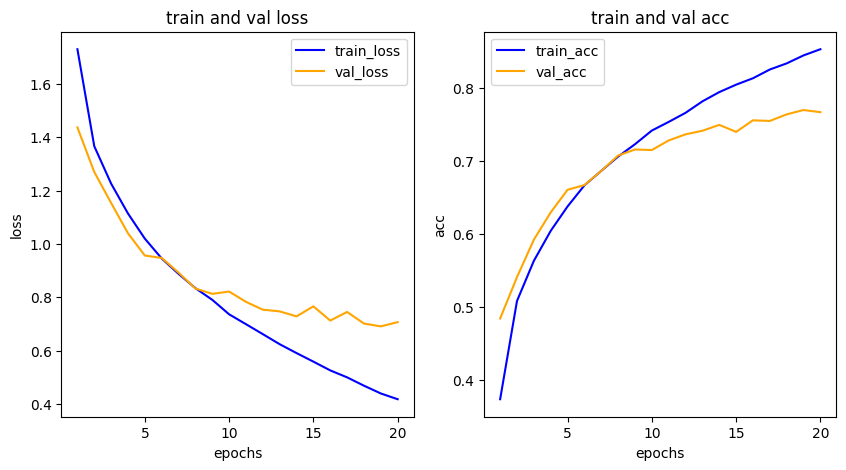

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7422 - acc: 0.7632


[0.7421900629997253, 0.7631999850273132]

## 정확도가 높은 분류 모델 구성 - 전이학습 모델


*   과대적합 피하고, 정확도는 높이기
*   https://wikidocs.net/164796
*   VGG16(Visual Geometry Group) 모델을 활용한 분류 모델 구성



In [ ]:
from keras.models import Sequential
from keras.applications import VGG16 # 케라스에서 제공하는 모델 불러오기
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# 전이학습 모델 가져오기
pre_trained_vgg = VGG16(input_shape=(32,32,3), include_top=False, weights='imagenet')
pre_trained_vgg.summary()

# 분류모델 합치기
model = Sequential()
model.add(pre_trained_vgg)
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 128)         589952    
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 128)         147584    
                                                                 
 global_average_pooling2d_1   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                      

In [ ]:
model.compile(optimizer = Adam(1e-4), # 러닝레이트를 정해줌
             loss = 'sparse_categorical_crossentropy', #원-핫 인코딩 사용하지 않는 경우 (0-9 레이블 그대로 사용하는 경우)
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/15
1094/1094 [==============================] - 50s 37ms/step - loss: 1.0353 - acc: 0.6405 - val_loss: 0.7524 - val_acc: 0.7392
Epoch 2/15
1094/1094 [==============================] - 38s 35ms/step - loss: 0.6042 - acc: 0.8023 - val_loss: 0.5609 - val_acc: 0.8143
Epoch 3/15
1094/1094 [==============================] - 38s 35ms/step - loss: 0.4393 - acc: 0.8561 - val_loss: 0.6044 - val_acc: 0.8075
Epoch 4/15
1094/1094 [==============================] - 38s 35ms/step - loss: 0.3317 - acc: 0.8917 - val_loss: 0.5774 - val_acc: 0.8121
Epoch 5/15
1094/1094 [==============================] - 38s 35ms/step - loss: 0.2453 - acc: 0.9205 - val_loss: 0.5226 - val_acc: 0.8355
Epoch 6/15
1094/1094 [==============================] - 38s 34ms/step - loss: 0.1805 - acc: 0.9406 - val_loss: 0.5500 - val_acc: 0.8528
Epoch 7/15
1094/1094 [==============================] - 36s 33ms/step - loss: 0.1387 - acc: 0.9565 - val_loss: 0.5652 - val_acc: 0.8575
Epoch 8/15
1094/1094 [==========================

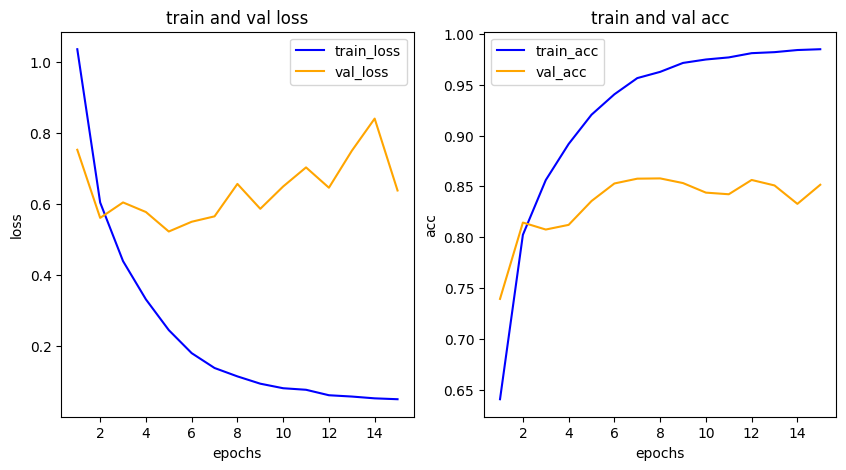

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.7032 - acc: 0.8407


[0.703209638595581, 0.8406999707221985]